In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
def tenure_segment(tenure):
    if tenure <= 12:
        return 'New'
    elif 12 < tenure <= 48:
        return 'Intermediate'
    else:
        return 'Long-term'

# Apply segmentation
df['TenureSegment'] = df['tenure'].apply(tenure_segment)

# 3. Define Segments based on Monthly Charges
monthly_quartiles = df['MonthlyCharges'].quantile([0.25, 0.5, 0.75])

def charge_segment(charge):
    if charge <= monthly_quartiles[0.25]:
        return 'Low'
    elif charge <= monthly_quartiles[0.5]:
        return 'Medium'
    elif charge <= monthly_quartiles[0.75]:
        return 'High'
    else:
        return 'Very High'
df['ChargeSegment'] = df['MonthlyCharges'].apply(charge_segment)

In [4]:
churn_by_tenure = df.groupby(['TenureSegment', 'Churn']).size().unstack()
churn_by_charge = df.groupby(['ChargeSegment', 'Churn']).size().unstack()
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()

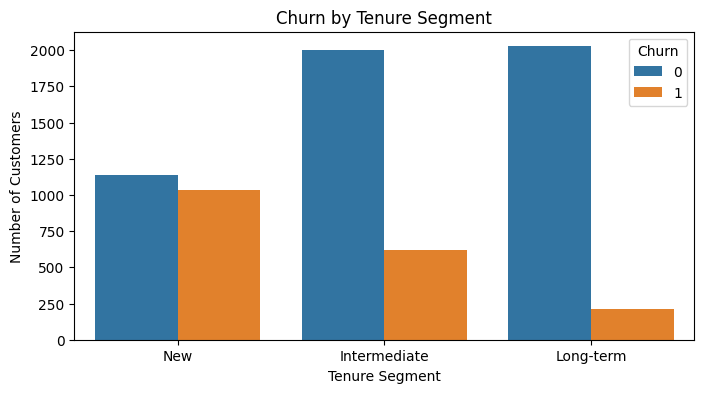

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x='TenureSegment', hue='Churn', data=df)
plt.title("Churn by Tenure Segment")
plt.xlabel("Tenure Segment")
plt.ylabel("Number of Customers")
plt.show()

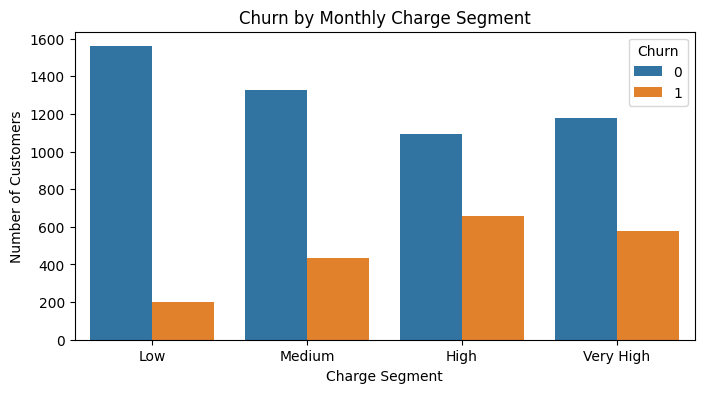

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(x='ChargeSegment', hue='Churn', data=df)
plt.title("Churn by Monthly Charge Segment")
plt.xlabel("Charge Segment")
plt.ylabel("Number of Customers")
plt.show()

In [7]:
high_value_risk = df[(df['ChargeSegment'] == 'Very High') & (df['Churn'] == 'Yes')]
print("\nHigh-Value Customers at Risk of Churning:")
print(high_value_risk[['customerID', 'tenure', 'MonthlyCharges', 'Contract']])


High-Value Customers at Risk of Churning:
Empty DataFrame
Columns: [customerID, tenure, MonthlyCharges, Contract]
Index: []
